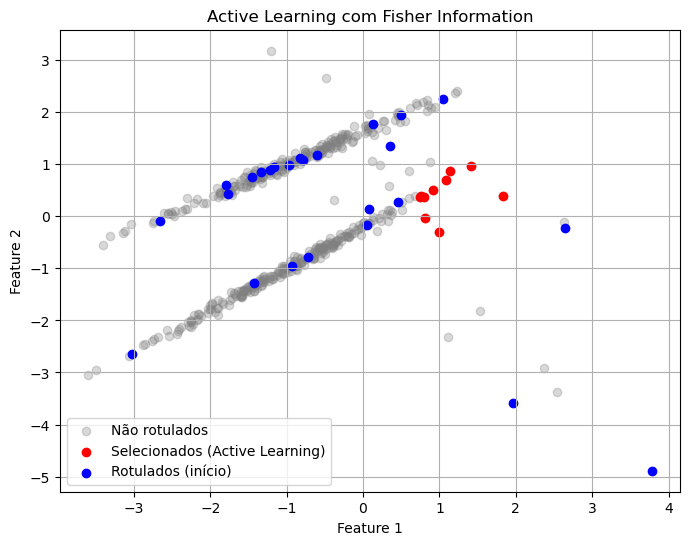

In [21]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Gerar dados desbalanceados
# X, y = make_classification(n_samples=100, n_features=2, weights=[0.95, 0.05], random_state=42)
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    weights=[0.95, 0.05],
    random_state=42
)
# Separar um conjunto rotulado pequeno e um conjunto não rotulado
labeled_idx = np.random.choice(np.where(y == 1)[0], size=5, replace=False).tolist()
labeled_idx += list(np.random.choice(np.where(y == 0)[0], size=20, replace=False))
unlabeled_idx = list(set(range(len(X))) - set(labeled_idx))

X_labeled = X[labeled_idx]
y_labeled = y[labeled_idx]

# Treinar modelo com os dados rotulados
model = LogisticRegression(solver='lbfgs')
model.fit(X_labeled, y_labeled)

# Prever probabilidades nas amostras não rotuladas
probs = model.predict_proba(X[unlabeled_idx])[:, 1]  # Prob de classe 1

# Calcular Fisher Information escalar para cada amostra (proporcional)
fim_scores = probs * (1 - probs)

# Selecionar top-k amostras mais informativas
k = 10
topk_indices = np.argsort(fim_scores)[-k:]
selected_idx = np.array(unlabeled_idx)[topk_indices]

# Visualização
plt.figure(figsize=(8, 6))
plt.scatter(X[unlabeled_idx][:, 0], X[unlabeled_idx][:, 1], c='gray', alpha=0.3, label='Não rotulados')
plt.scatter(X[selected_idx][:, 0], X[selected_idx][:, 1], c='red', label='Selecionados (Active Learning)')
plt.scatter(X[labeled_idx][:, 0], X[labeled_idx][:, 1], c='blue', label='Rotulados (início)')
plt.legend()
plt.title("Active Learning com Fisher Information")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
